In [1]:
%pip install matplotlib pandas numpy seaborn nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
from pandas import DataFrame 
from pandas import Series 
import matplotlib.pyplot as plt
import json
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_data_message(st):
    st =  st.replace("#", '')
    st =  st.replace("\r", '')
    st =  st.replace("\n", '')
    return st


In [4]:
#ƒë·ªçc d·ªØ li·ªáu t·ª´ file data.csv
df = pd.read_csv("data.csv")
df['message_post'] = df['message_post'].apply(clean_data_message)# l√†m s·∫°ch 1 l·∫ßn n·ªØa message_post (do ƒë·ªçc t·ª´ file n√™n g√¢y ra 1 v√†i chi ti·∫øt nh·ªè nh∆∞ "\n" v√† "\r" trong message_post)


In [5]:
df # thay ƒë·ªïi clean hastag ·ªü crawdata

message_post  \
0             T√¨nh m·∫π bao la n·∫∑ng nh∆∞ bi·ªÉn  L√™ B·∫£o   
1    C√¢u chuy·ªán c·∫£m ƒë·ªông... g·ªõt n∆∞·ªõc m·∫Øt  VT Vlog    
2                  C·ª© th·∫ø m√† √°p d·ª•ng nha anh em :3   
3    √îng c·ª©u h·ªô ch·∫Øc nghi√™n c·ª©u th·ªã tr∆∞·ªùng k·ªπ l·∫Øm    
4                          C≈©ng cute  Quang Truong   
..                                             ...   
495                 Tr∆∞·ªüng th√†nh c√πng nhau b·∫°n nh√©   
496                           Nh√¨n l√† mu·ªën ƒÉn r·ªìi    
497                                Vai di·ªÖn ƒë·ªÉ ƒë·ªùi   
498                          Sau nh·ªõ gi·ªØ ch·∫∑t nh√©    
499                Ch·ª´ng n√†y tho·∫£i m√°i ƒÉn nh√© con    

                                           id_post              time_created  \
0    facebook.com/1521822118121953_675334698063723  2023-11-14T07:12:00+0000   
1    facebook.com/1521822118121953_675229141407612  2023-11-14T04:00:59+0000   
2    facebook.com/1521822118121953_675227631407763  2023-11-14T02:00:57+0000   
3    facebook.com/1521822118121953_674869951443531  2023-11-13T13:00:27+0000   
4    facebook.com/1521822118121953_674869198110273  2023-11-13T09:00:35+0000   
..                                             ...                       ...   
495  facebook.com/1521822118121953_635370968726763  2023-09-02T09:00:00+0000   
496  facebook.com/1521822118121953_635412755389251  2023-09-02T08:00:15+0000   
497  facebook.com/1521822118121953_635367918727068  2023-09-02T07:00:00+0000   
498  facebook.com/1521822118121953_635401235390403  2023-09-02T04:00:43+0000   
499  facebook.com/1521822118121953_635344948729365  2023-09-02T02:00:01+0000   

     hours_time_created  total_comments  total_of_reactions  reactions_like  \
0                     7              16                 514             213   
1                     4             454                4073            1113   
2                     2            2451               41612           16086   
3                    13             446               21698            7600   
4                     9            5375               22518            6984   
..                  ...             ...                 ...             ...   
495                   9             112               41198           13061   
496                   8              91                3255            3019   
497                   7              33               44735           28268   
498                   4              60              411935          167348   
499                   2              47                4201            1755   

     reactions_love  reactions_wow  reactions_haha  reactions_sad  \
0                 2              0             296              3   
1                11             10            2806            132   
2               170             52           25055            243   
3                28             43           13851            172   
4                45             46           13690           1750   
..              ...            ...             ...            ...   
495             103             76           27128            825   
496               3              0             213             19   
497             227             55           15866            315   
498            2261            533          239170           2608   
499              18              7            2386             34   

     reactions_angry  total_share  \
0                  0            2   
1                  1          120   
2                  6          918   
3                  4          195   
4                  3          935   
..               ...          ...   
495                5            8   
496                1           19   
497                4            3   
498               15           11   
499                1            7   

                                      comments_details  \
0    [{'name': 'Ho√†ng Th·∫Øng', 'id': '10003688155859.

In [6]:
df['comments_details'][0]

"[{'name': 'Ho√†ng Th·∫Øng', 'id': '100036881558597', 'message': 'Tr·∫ßn Thanh H∆∞∆°ng', 'time_created': '07', 'id_tag': '100003946438349'}, {'name': 'Vi Th·ªã Ph∆∞∆°ng Th·∫£o', 'id': '100003993594420', 'message': 'Nguy·ªÖn Qu√Ω', 'time_created': '07', 'id_tag': '100005336439749'}, {'name': 'Nguy·ªÖn D≈©ng', 'id': '100051362597221', 'message': 'B√≠ch Ng·ªçc', 'time_created': '08', 'id_tag': '100055924734840'}, {'name': 'Tr·∫ßn ƒê·∫°t', 'id': '100063736323085', 'message': 'Puw Wie :)))', 'time_created': '07', 'id_tag': '100063694201989'}, {'name': 'Thanh Mio', 'id': '100033584205733', 'message': 'Con c√≥ hi·∫øu gh√™', 'time_created': '07', 'id_tag': ''}, {'name': 'Ho√†ng V√µ', 'id': '100045901773366', 'message': 'Cha b·ªë nh√† anh, con vs c√°i ', 'time_created': '08', 'id_tag': ''}, {'name': 'VladimirPutin', 'category': 'News & media website', 'category_list': [{'id': '2709', 'name': 'News & media website'}, {'id': '2233', 'name': 'Media/News Company'}], 'id': '111965198678057', 'messag

In [7]:
#link c√°c b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t(trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y)
print(df[df['total_of_reactions']==df['total_of_reactions'].max()]['id_post'])
#c√°c b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t(trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y)
df[df['total_of_reactions']==df['total_of_reactions'].max()]


48     facebook.com/1521822118121953_670309978566195
73     facebook.com/1521822118121953_668279572102569
98     facebook.com/1521822118121953_665107712419755
123    facebook.com/1521822118121953_662965575967302
148    facebook.com/1521822118121953_661267642803762
173    facebook.com/1521822118121953_658459763084550
198    facebook.com/1521822118121953_656070883323438
223    facebook.com/1521822118121953_653796226884237
248    facebook.com/1521822118121953_651388387125021
273    facebook.com/1521822118121953_649606333969893
298    facebook.com/1521822118121953_646889420908251
323    facebook.com/1521822118121953_646413457622514
348    facebook.com/1521822118121953_644984061098787
373    facebook.com/1521822118121953_642946197969240
398    facebook.com/1521822118121953_641361368127723
423    facebook.com/1521822118121953_639290541668139
448    facebook.com/1521822118121953_638787588385101
473    facebook.com/1521822118121953_637322835198243
498    facebook.com/1521822118121953_635401235

message_post  \
48                  Kh√¥ng ng·ªù t·ªõi lu√¥n =)) mycute22215   
73              C√≥ √¥ng b·ªë ch·∫•t l∆∞·ª£ng th·∫≠t duyvuonght38   
98        Ng√†y ƒëi ng√†n d·∫∑m m·ªói t·ªôi kh√¥ng leo n√∫i ƒë∆∞·ª£c    
123                               Kh√¥ng ch∆°i th√¨ next    
148            V√°n bida th·∫ßn k·ª≥, c·ª© ch·ªçt l√† m·ªçc ra l·ªó    
173                  Nh·∫π kh√¥ng th√≠ch c·ª© th√≠ch m·∫°nh c∆°    
198                           M·ªôt track b√¨nh thi√™n h·∫°    
223                 N·∫øu bi·∫øt ng√†y mai em l·∫•y ch·ªìng...    
248  Gia ƒë√¨nh b·ªëc thu·ªëc nam n·ªïi ti·∫øng nh·∫•t v√πng, ·∫•y...   
273                     Anh r·∫•t t·ªët nh∆∞ng em r·∫•t ti·∫øc    
298                           N·ªói ni·ªÅm n√†y ai m√† th·∫•u    
323                                      Ti·ªán qu√° hihi   
348        Ph∆∞∆°ng ∆°i em th√≠ch g√¨ ƒë·∫•y n√≥i anh nghe n√†o    
373                             C√πng h·ªçc v·ªÅ kh√≠ kh·ªïng    
398                       B·ªãch h√∫t ·∫©m n√†y gi·∫•u h∆°i kƒ©    
423                    C√≤n g√¨ n·ªØa ƒë√¢u m√† kh√≥k v·ªõi s·∫ßu    
448                      C√°c ch√°u c√≥ nƒÉng khi·∫øu t·ª´ b√©    
473                             Nh·∫Øn nh·∫ßm √Ω m√† b·∫°n ∆°i    
498                              Sau nh·ªõ gi·ªØ ch·∫∑t nh√©    

                                           id_post              time_created  \
48   facebook.com/1521822118121953_670309978566195  2023-11-05T09:00:53+0000   
73   facebook.com/1521822118121953_668279572102569  2023-10-31T07:00:03+0000   
98   facebook.com/1521822118121953_665107712419755  2023-10-26T14:00:01+0000   
123  facebook.com/1521822118121953_662965575967302  2023-10-22T13:00:05+0000   
148  facebook.com/1521822118121953_661267642803762  2023-10-18T04:05:26+0000   
173  facebook.com/1521822118121953_658459763084550  2023-10-13T13:00:30+0000   
198  facebook.com/1521822118121953_656070883323438  2023-10-09T13:00:02+0000   
223  facebook.com/1521822118121953_653796226884237  2023-10-05T07:00:31+0000   
248  facebook.com/1521822118121953_651388387125021  2023-09-30T13:00:06+0000   
273  facebook.com/1521822118121953_649606333969893  2023-09-27T14:00:01+0000   
298  facebook.com/1521822118121953_646889420908251  2023-09-24T12:00:15+0000   
323  facebook.com/1521822118121953_646413457622514  2023-09-21T13:00:00+0000   
348  facebook.com/1521822118121953_644984061098787  2023-09-18T14:58:21+0000   
373  facebook.com/1521822118121953_642946197969240  2023-09-15T14:00:00+0000   
398  facebook.com/1521822118121953_641361368127723  2023-09-12T14:00:00+0000   
423  facebook.com/1521822118121953_639290541668139  2023-09-10T04:00:39+0000   
448  facebook.com/1521822118121953_638787588385101  2023-09-07T10:00:43+0000   
473  facebook.com/1521822118121953_637322835198243  2023-09-04T13:00:00+0000   
498  facebook.com/1521822118121953_635401235390403  2023-09-02T04:00:43+0000   

     hours_time_created  total_comments  total_of_reactions  reactions_like  \
48                    9           16076              411935          167348   
73                    7            1400              411935          167348   
98                   14            1567              411935          167348   
123                  13           11035              411935          167348   
148                   4            2717              411935          167348   
173                  13            6054              411935          167348   
198                  13            8619              411935          167348   
223                   7             161              411935          167348   
248                  13             263              411935          167348   
273                  14             384              411935          167348   
298                  12             748              411935          167348   
323                  13              62              411935          167348   
348                  14              16              411935          167348   


th·ªùi ƒëi·ªÉm ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong ng√†y c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y : 9h


Text(0.5, 1.0, 'T·ªïng s·ªë b√†i ƒëƒÉng theo th·ªùi ƒëi·ªÉm trong ng√†y c·ªßa 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y')

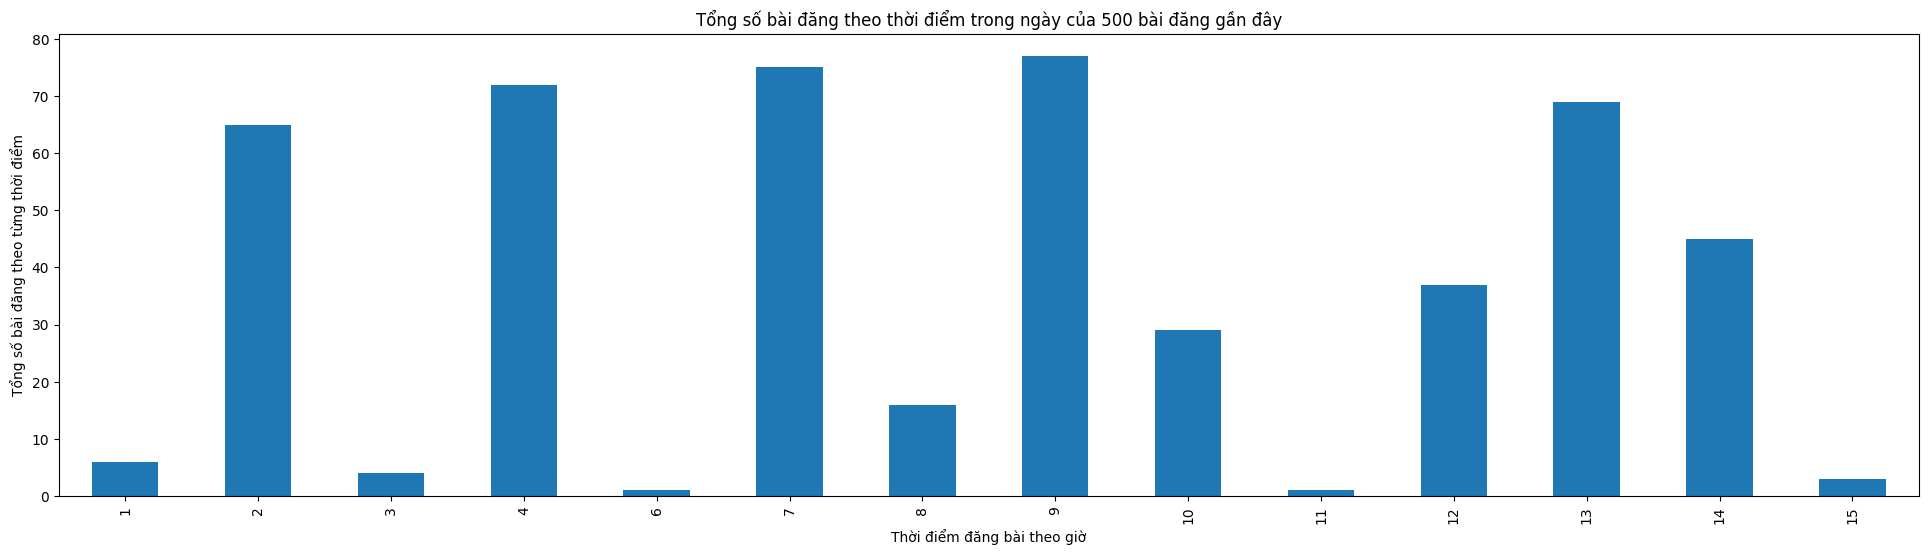

In [8]:
# th·ªùi ƒëi·ªÉm trong ng√†y ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y
print("th·ªùi ƒëi·ªÉm ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong ng√†y c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y : %sh" % df['hours_time_created'].mode().iloc[0], sep = ' ')
#l∆∞·ª£c ƒë·ªì tr·ª±c quan:
dia1 = df['hours_time_created'].value_counts().sort_index().plot(kind = 'bar',figsize=(24,6))
dia1.set_xlabel('Th·ªùi ƒëi·ªÉm ƒëƒÉng b√†i theo gi·ªù')
dia1.set_ylabel('T·ªïng s·ªë b√†i ƒëƒÉng theo t·ª´ng th·ªùi ƒëi·ªÉm')
dia1.set_title('T·ªïng s·ªë b√†i ƒëƒÉng theo th·ªùi ƒëi·ªÉm trong ng√†y c·ªßa 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y')

In [9]:
#xu h∆∞·ªõng comments v√†o gi·ªù n√†o()
#
data_comments = []
with open('raw_comments.json', 'r') as handler:
    data_comments = json.load(handler)
data_comments[0][0]['time_created']
#cho v√†o list_time_comments_Created
list_time_comments_created = []
for i in data_comments:
    for j in i:
        list_time_comments_created.append(j['time_created'])
list_time_comments_created.sort(reverse=True)        

Text(0, 0.5, 't·ªïng s·ªë l∆∞·ª£ng comments')

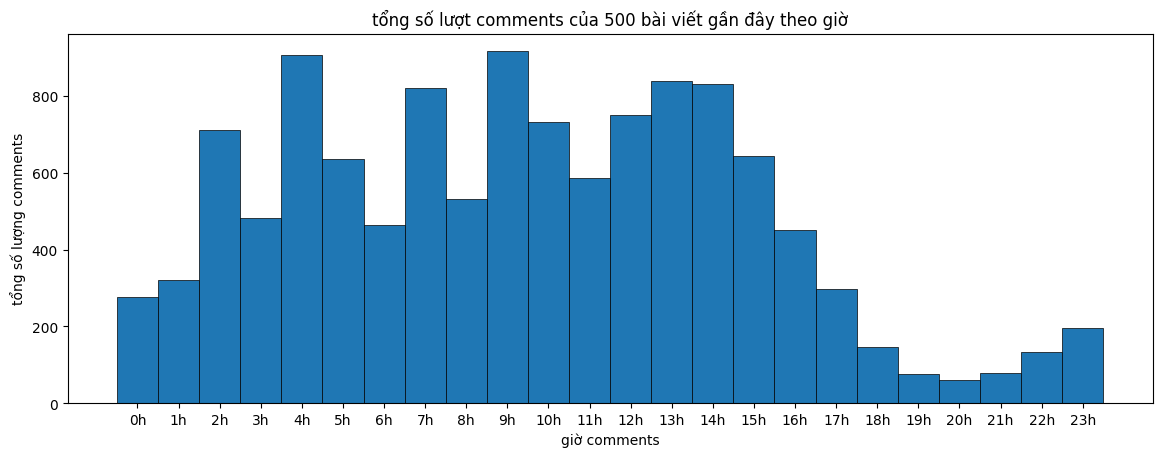

In [10]:
#l∆∞·ª£c ƒë·ªì tr·ª±c quan
series_time_comments = pd.Series(list_time_comments_created)
fig_time_comments ,ax_time_comments = plt.subplots(1,1)
y = [(str(i)+'h')for i in range (0,24)]
ax_time_comments.bar(y, series_time_comments.value_counts().sort_index().values ,width=1, edgecolor="black", linewidth=0.5)
fig_time_comments
fig_time_comments.set_figwidth(14)
ax_time_comments.set_title('t·ªïng s·ªë l∆∞·ª£t comments c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y theo gi·ªù')
ax_time_comments.set_xlabel('gi·ªù comments')
ax_time_comments.set_ylabel('t·ªïng s·ªë l∆∞·ª£ng comments')

In [11]:
df['total_of_reactions']

0         514
1        4073
2       41612
3       21698
4       22518
        ...  
495     41198
496      3255
497     44735
498    411935
499      4201
Name: total_of_reactions, Length: 500, dtype: int64

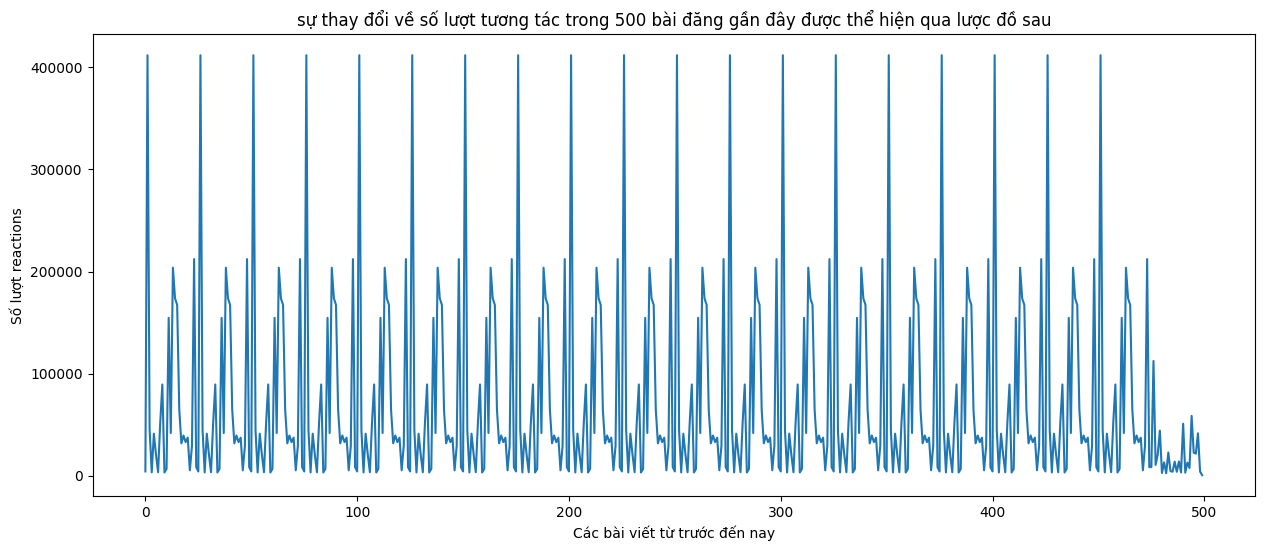

In [12]:
#s·ª± they ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y ƒë∆∞·ª£c th·ªÉ hi·ªán qua l∆∞·ª£c ƒë·ªì sau
fig, ax = plt.subplots(1,1)
plot_reactions = pd.DataFrame(df['total_of_reactions'],index=[i for i in range(0,500)])
plot_reactions_index = plot_reactions.index
plot_reactions = plot_reactions.iloc[::-1]
plot_reactions.index = plot_reactions_index
ax.plot(plot_reactions)
ax.set_title('s·ª± thay ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y ƒë∆∞·ª£c th·ªÉ hi·ªán qua l∆∞·ª£c ƒë·ªì sau')
ax.set_ylabel('S·ªë l∆∞·ª£t reactions')
ax.set_xlabel('C√°c b√†i vi·∫øt t·ª´ tr∆∞·ªõc ƒë·∫øn nay')
fig.set_figheight(6)
fig.set_figwidth(15)
#trong l∆∞·ª£c ƒë·ªì d∆∞·ªõi ƒë√¢y, c√°c b√†i vi·∫øt theo th·ª© t·ª± t·ª´ xa nh·∫•t ƒë·∫øn g·∫ßn nh·∫•t(t·ª´ tr√°i sang ph·∫£i)

In [13]:
#c√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c b√†i ƒëƒÉng
list_keyword_and_frequency = Counter(" ".join(df['message_post']).split()).most_common(5) #l·∫•y 5 t·ª´
index_lkaf = []
value_lkaf = []
for i in list_keyword_and_frequency:
    index_lkaf.append(i[0])
    value_lkaf.append(i[1])
visualization_list_keyword_and_frequency = pd.Series(value_lkaf, index=index_lkaf)


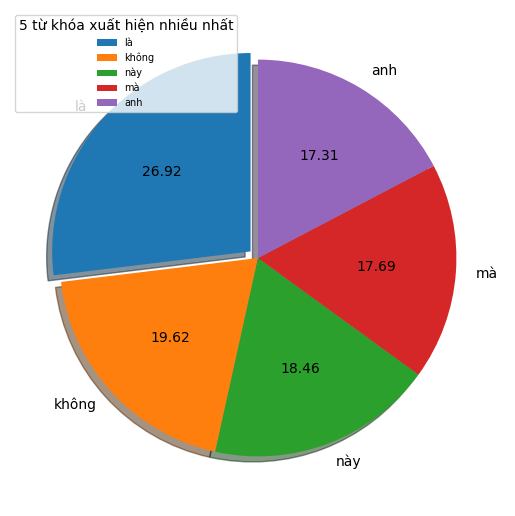

In [14]:
#l∆∞·ª£c ƒë·ªì tr·ª±c quan
fig, ax = plt.subplots(1,1)
ax.pie(visualization_list_keyword_and_frequency,shadow=True, labels=visualization_list_keyword_and_frequency.index, startangle=90, explode=(0.05,0,0,0,0),autopct='%.2f')
ax.legend(title = '5 t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t',loc=2,prop={'size':7})
fig.set_figheight(20)#checkpoint



In [15]:
#hastag xu·∫•t hi·ªán nhi·ªÅu nh·∫•t
list_hastag = []
with open('file_hastag.txt','r',encoding='utf8') as handler:
     list_hastag = handler.readlines()
for i in range(len(list_hastag)):
    list_hastag[i] = list_hastag[i].replace("\n",'')
series_hastag = pd.Series(list_hastag)  
series_hastag.value_counts()  # => page c√≥ √≠t s·ªë l∆∞·ª£ng c√°c hastag kh√°c nhau n√™n page n√†y kh√¥ng ƒë·ªÉ qu·∫£ng c√°o

  

anhdaden                            483
anhdavang                             5
HangHieuGiaHoi                        1
AHauntingInVeniceVN                   1
                                      1
BiaTuyetEdelweiss                     1
Edelweiss                             1
BeerxologyMaster                      1
Edelweisscocktail                     1
TheatorVN                             1
ParodyMusic                           1
HoaC∆∞·ªõi                               1
Hu·ª≥nhL·∫≠p                              1
M√πiGiaTruy·ªÅn                          1
VPIM2023                              1
HaNoiVibes                            1
VPBankHanoiInternationalMarathon      1
Kplus                                 1
TheMarvelsVN                          1
SaleBomTan                            1
Lazada1111                            1
SanDealHoi                            1
Name: count, dtype: int64

In [41]:
# t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£t reactions v√† s·ªë l∆∞·ª£t b√¨nh lu·∫≠n



In [ ]:
# [i for i in range(1,501)], df['reactions_like'],[i for i in range(1,501)],df['reactions_love'],
#                  [i for i in range(1,501)], df['reactions_wow'],[i for i in range(1,501)], df['reactions_haha'],
#                  [i for i in range(1,501)], df['reactions_sad'],[i for i in range(1,501)], df['reactions_angry'],
#                  [i for i in range(1,501)], df['total_comments']

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

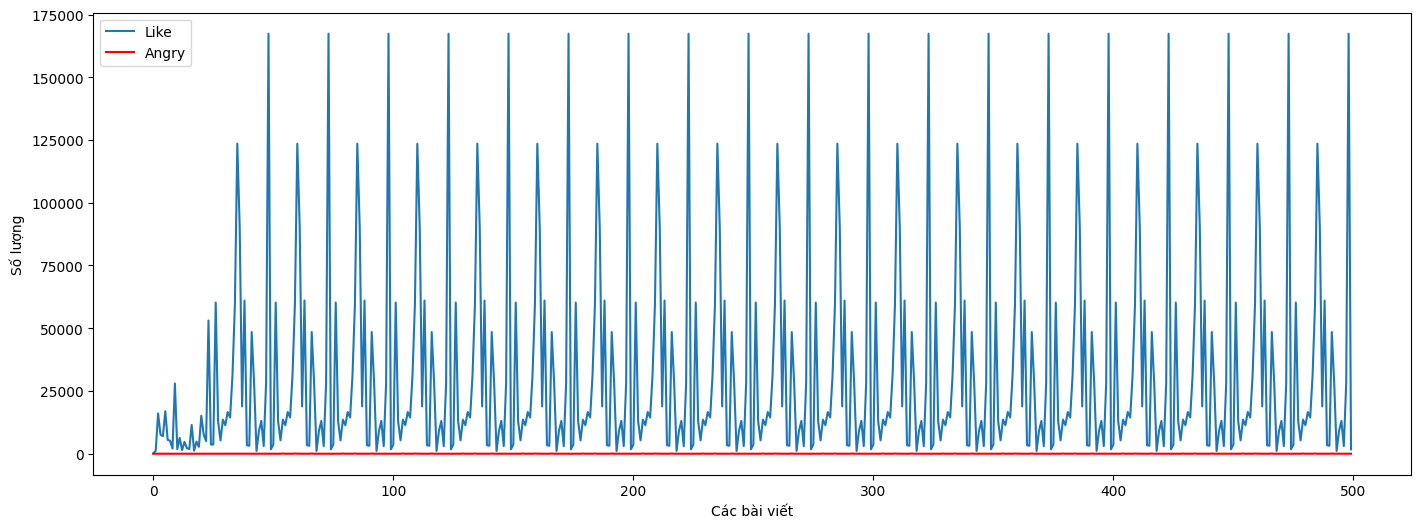

In [16]:
#t∆∞∆°ng quan gi·ªØa Like v√† Angry
fig_six_at ,axis_six_at = plt.subplots(1,1)
axis_six_at.plot( df['reactions_like'],label='Like')
axis_six_at.plot(df['reactions_angry'],label='Angry',color='r')
axis_six_at.legend()
fig_six_at.set_figwidth(17)
fig_six_at.set_figheight(6)
#s·ªë l∆∞·ª£ng Like √°p ƒë·∫£o r·∫•t nhi·ªÅu l·∫ßn so v·ªõi s·ªë l∆∞·ª£ng angry theo nh∆∞ ƒë·ªì th·ªã th√¨ s·ªë angry loanh quanh ·ªü m·ª©c 0 => page ƒë∆∞·ª£c nhi·ªÅu ng∆∞·ªùi y√™u th√≠ch
axis_six_at.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at.set_xlabel('C√°c b√†i vi·∫øt')

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

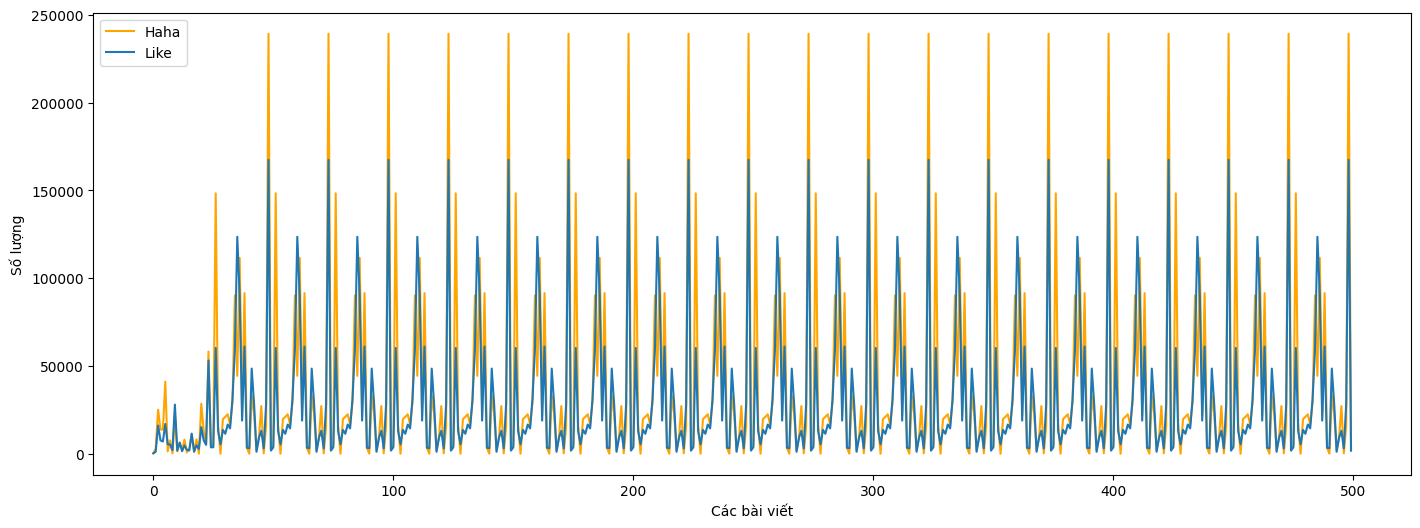

In [17]:
#t∆∞∆°ng quan gi·ªØa Haha v√† Like
fig_six_at_1 ,axis_six_at_1 = plt.subplots(1,1)
axis_six_at_1.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_1.plot(df['reactions_like'],label='Like')
axis_six_at_1.legend()
fig_six_at_1.set_figwidth(17)
fig_six_at_1.set_figheight(6)
axis_six_at_1.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_1.set_xlabel('C√°c b√†i vi·∫øt')
#s·ªë l∆∞·ª£ng like kh√° nhi·ªÅu nh∆∞ng s·ªë l∆∞·ª£ng haha c√≤n nhi·ªÅu h∆°n h·∫≥n ch·ª©ng t·ªè c√°c b√†i vi·∫øt c·ªßa page n√†y r·∫•t mang t√≠nh gi·∫£i tr√≠(n·∫øu kh√¥ng c√≥ t√≠nh gi·∫£i tr√≠ th√¨ ng∆∞·ªùi xem s·∫Ω ch·ªâ ti·ªán tay ·∫•n like r·ªìi b·ªè qua)

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

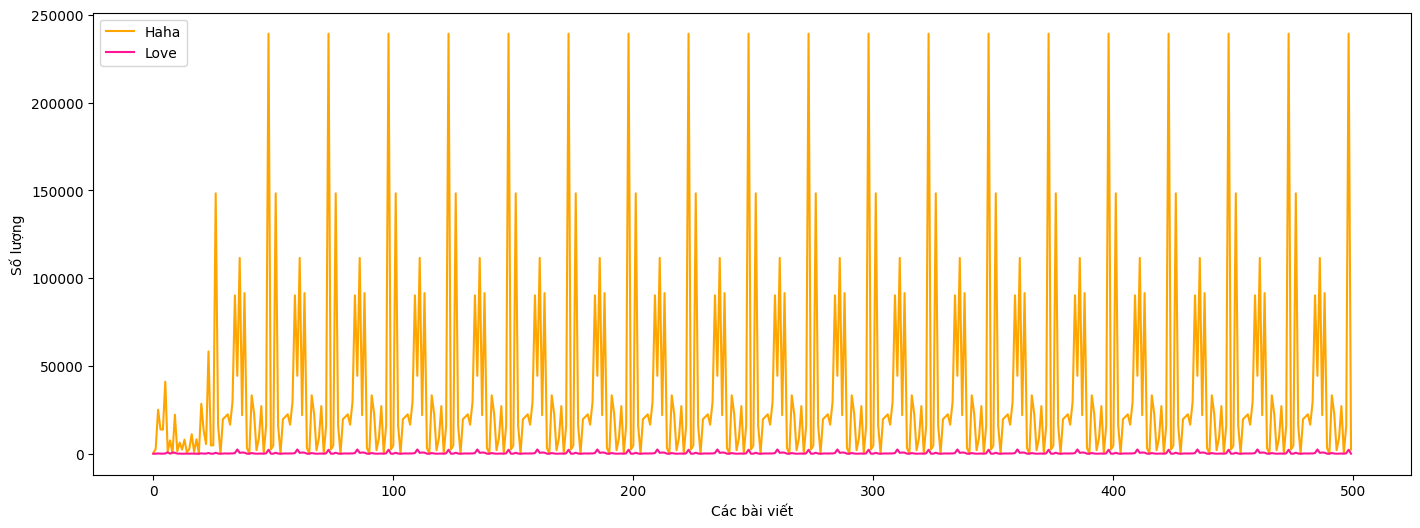

In [18]:
#t∆∞∆°ng quan gi·ªØa Haha v√† Love
fig_six_at_2 ,axis_six_at_2 = plt.subplots(1,1)
axis_six_at_2.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_2.plot(df['reactions_love'],label='Love',color='deeppink')
axis_six_at_2.legend()
fig_six_at_2.set_figwidth(17)
fig_six_at_2.set_figheight(6)
axis_six_at_2.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_2.set_xlabel('C√°c b√†i vi·∫øt')
#s·ªë l∆∞·ª£ng c√°c b√†i vi·∫øt c√≥ t√≠nh nh√¢n vƒÉn c·ªßa page h∆°i √≠t(nh√¢n vƒÉn th√¨ ch·∫£ ai ƒëi th·∫£ haha c·∫£)

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

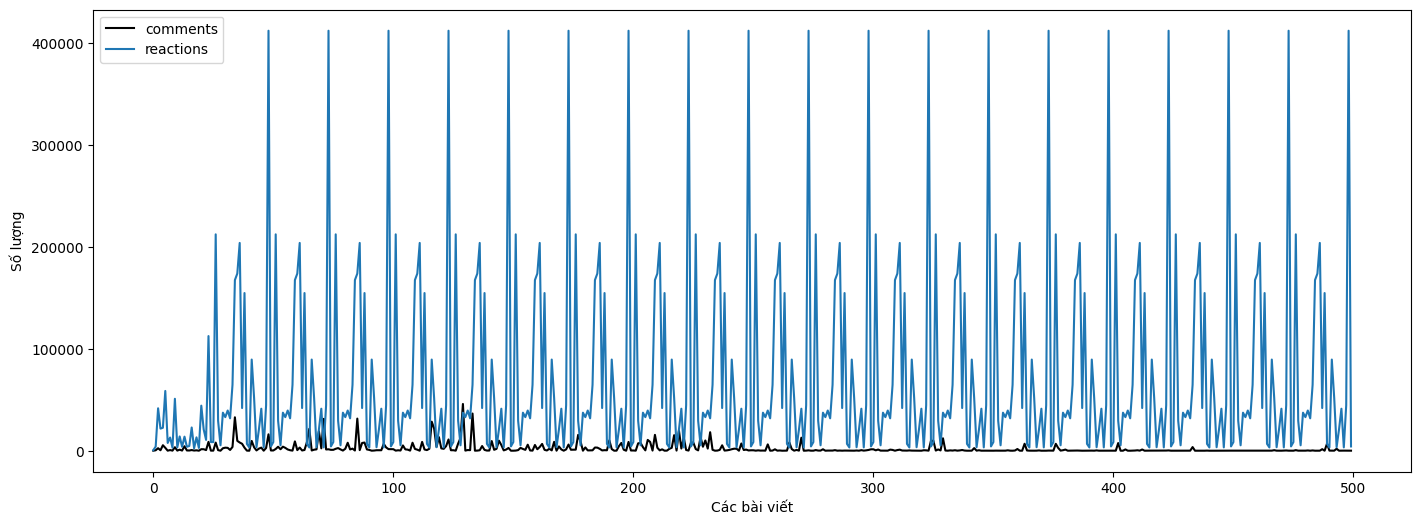

In [19]:
#T∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v√† s·ªë l∆∞·ª£ng comments
fig_six_at_3 ,axis_six_at_3 = plt.subplots(1,1)
axis_six_at_3.plot( df['total_comments'],label='comments', color = 'black')
axis_six_at_3.plot(df['total_of_reactions'],label='reactions')
axis_six_at_3.legend()
fig_six_at_3.set_figwidth(17)
fig_six_at_3.set_figheight(6)
axis_six_at_3.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_3.set_xlabel('C√°c b√†i vi·∫øt')
#s·ªë l∆∞·ª£t b√¨nh lu·∫≠n so v·ªõi s·ªë l∆∞·ª£t reactions h∆°i k√©m, n·ªôi dung truy·ªÅn t·∫£i c·ªßa b√†i vi·∫øt( video c·ªßa b√†i vi·∫øt , ·∫£nh c·ªßa b√†i vi·∫øt,text) l√† t∆∞∆°ng ƒë·ªëi r√µ r√†ng , nh∆∞ng kh√¥ng ƒë·ªß s√¢u s·∫Øc v·ªÅ c√°c v·∫•n ƒë·ªÅ hi·ªán t·∫°i trong x√£ h·ªôi m√† m·ªçi ng∆∞·ªùi quan t√¢m ƒë·ªÉ m·ªçi ng∆∞·ªùi tham gia b√¨nh lu·∫≠n

In [56]:
no_video = df[df['len_video'] == '0']['len_video'].count()
video = 500 - no_video
series_video=[]
for i in range(video):
    series_video.append('c√≥ video')
for i in range(no_video):
    series_video.append('kh√¥ng video')   
plt_series = pd.Series(series_video)     

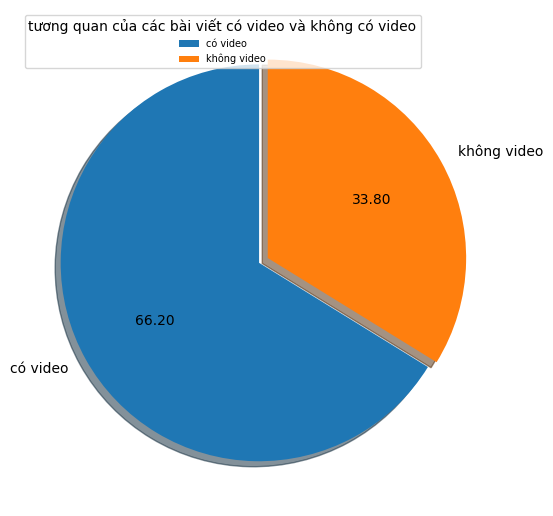

In [58]:
fig_video, ax_video = plt.subplots(1,1)
ax_video.pie(plt_series.value_counts(),shadow=True, labels=plt_series.value_counts().index, startangle=90, explode=(0.05,0),autopct='%.2f')
ax_video.legend(title = 't∆∞∆°ng quan c·ªßa c√°c b√†i vi·∫øt c√≥ video v√† kh√¥ng c√≥ video',loc=2,prop={'size':7})
fig_video.set_figheight(20)#checkpoint

In [24]:
with open('user_data_js.json', 'r') as handler:
    rea = json.load(handler)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
rea # s·ªë 15 l√† c√≥ ƒë·∫ßy ƒë·ªß ng√†y th√°ng nƒÉm sinh
#s·ªë 4 l√† c√≥ ƒë·∫ßy ƒë·ªß c√°c tr∆∞·ªùng c·∫ßn l·∫•y nh∆∞ng birthday thi·∫øu nƒÉm sinh

[{'gender': 'female', 'name': 'L√™ Th√πy Tr√¢m', 'id': '100073631839137'},
 {'gender': 'male',
  'hometown': {'id': '110240662338586', 'name': 'ƒêi·ªán B√†n'},
  'name': 'T∆∞·ªùng Huy',
  'id': '100025932240893'},
 {'education': [{'school': {'id': '109023919492786',
     'name': 'Tr∆∞·ªùng Cao ƒë·∫≥ng C√¥ng ngh·ªá cao ƒê·ªìng Nai'},
    'type': 'College',
    'id': '789696838218119'},
   {'school': {'id': '743811409002144', 'name': 'Tr∆∞·ªùng ƒê·∫°i H·ªçc Tr√† Vinh'},
    'type': 'College',
    'id': '265262718308617'},
   {'school': {'id': '153055064737854', 'name': 'Truong THPT Song Ray'},
    'type': 'High School',
    'id': '835525810301888'}],
  'gender': 'male',
  'hometown': {'id': '101881563186877', 'name': 'C·∫©m M·ªπ'},
  'name': 'Mai K·∫øt Th∆∞∆°ng',
  'id': '100015334296634'},
 {'gender': 'female', 'name': 'Linh Linh', 'id': '100074257460620'},
 {'birthday': '04/13',
  'education': [{'school': {'id': '1432588070291470',
     'name': 'H·ªçc Vi·ªán C·∫£nh S√°t Nh√¢n D√¢n'},
 